# Imports

In [7]:
# Project setup and imports
import os, sys, random
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from svgutils.compose import Figure, Panel, SVG
import pickle
from matplotlib import colors as mcolors
from scipy.signal import savgol_filter

# Locate project root and add to path
cwd = Path.cwd()
PROJECT_ROOT = next((p for p in [cwd, *cwd.parents] if (p / 'src').exists()), cwd)
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

# Project-specific imports
from src.simulation import SR_sim
from src.plotting import SR_plotting
import src.sr_utils as utils
import src.correlation_analysis as ca
import src.twin_analysis as ta
import src.gamma_gompertz as gg
from src.HMD_lifetables import HMD
import saved_results.twin_studies_data as td
import saved_results.model_param_calibrations as pc

# Reproducibility setup
SEED = int(os.environ.get('PYTHONHASHSEED', '12345'))
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
RNG = np.random.default_rng(12345)

# Deterministic sampling helpers
def choice_deterministic(a, size=None, replace=True, p=None):
    return RNG.choice(a, size=size, replace=replace, p=p)

def rand_uniform(size=None):
    return RNG.random(size)

# Matplotlib configuration
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# Plot styling
plt.rc('axes', facecolor='white', grid=False)
plt.rc('axes.spines', top=False, right=False)
plt.rc('font', size=16)
plt.rc('axes', titlesize=28, labelsize=24)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('xtick.major', size=8, width=2.5)
plt.rc('ytick.major', size=8, width=2.5)
plt.rc('xtick.minor', size=5, width=2.5)
plt.rc('ytick.minor', size=5, width=2.5)
plt.rc('legend', fontsize=16)
plt.rc('figure', titlesize=28)

def remove_top_right_spines(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

# Jupyter extensions
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
sweden_cohort_f = HMD(country='swe', gender = 'female', data_type = 'cohort')
sweden_cohort_m = HMD(country='swe' , gender = 'male', data_type = 'cohort')
sweden_cohort_b = HMD(country='swe' , gender = 'both', data_type = 'cohort')

sweden_period_m = HMD(country='swe' , gender = 'male', data_type = 'period')
sweden_period_f = HMD(country='swe' , gender = 'female', data_type = 'period')

denmark_cohort_m = HMD(country='dan' , gender = 'male', data_type = 'cohort')
denmark_cohort_f = HMD(country='dan' , gender = 'female', data_type = 'cohort')
denmark_cohort_b = HMD(country='dan' , gender = 'both', data_type = 'cohort')

years = np.arange(1870, 1901, 1)

# Danish twins

(1870.0, 1900.0)

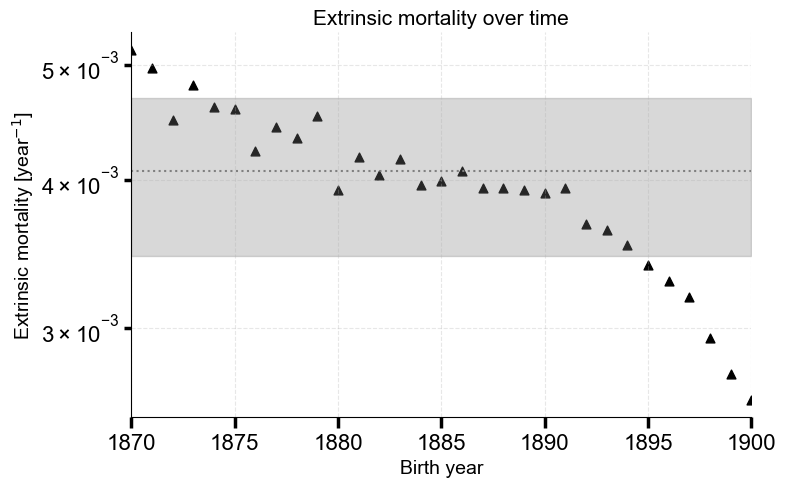

In [9]:
denmark_cohort_b.plot_makeham_term_trend(years = years, color = 'black')
ms = []
for year in years:
    dict = denmark_cohort_b.fit_ggm(year = year)
    ms.append(dict['m'])


mean_m = np.mean(ms)
std_m = np.std(ms)
plt.axhline(mean_m, color='grey', linestyle=':')
plt.fill_between([years.min(), years.max()], mean_m - std_m, mean_m + std_m, color='grey', alpha=0.3)
plt.xlim(years.min(), years.max())

# Sweden

Mean m: 0.00314, Std m: 0.00144


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


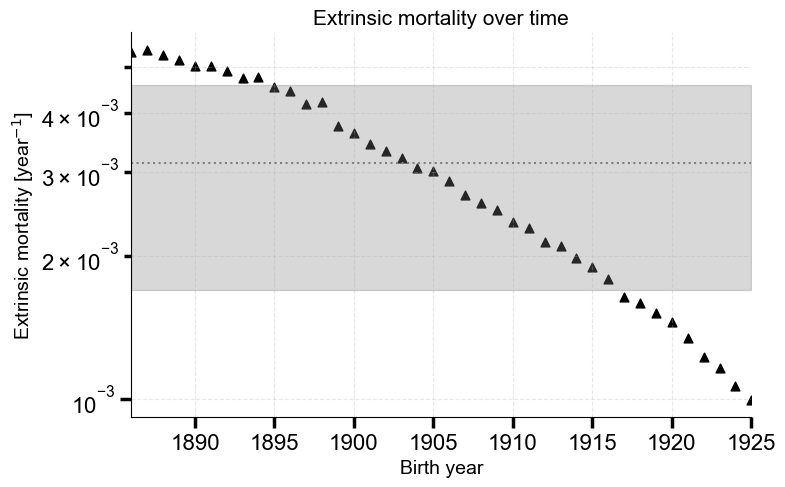

In [10]:
sweden_years = np.arange(1886, 1926, 1)
sweden_cohort_b.plot_makeham_term_trend(years = sweden_years, color = 'black')
ms = []
for year in sweden_years:
    dict = sweden_cohort_b.fit_ggm(year = year)
    ms.append(dict['m'])


mean_m = np.mean(ms)
std_m = np.std(ms)
plt.axhline(mean_m, color='grey', linestyle=':')
plt.fill_between([sweden_years.min(), sweden_years.max()], mean_m - std_m, mean_m + std_m, color='grey', alpha=0.3)
plt.xlim(sweden_years.min(), sweden_years.max())

print(f"Mean m: {mean_m:.5f}, Std m: {std_m:.5f}")

# SATSA

Mean m: 0.00182, Std m: 0.00096


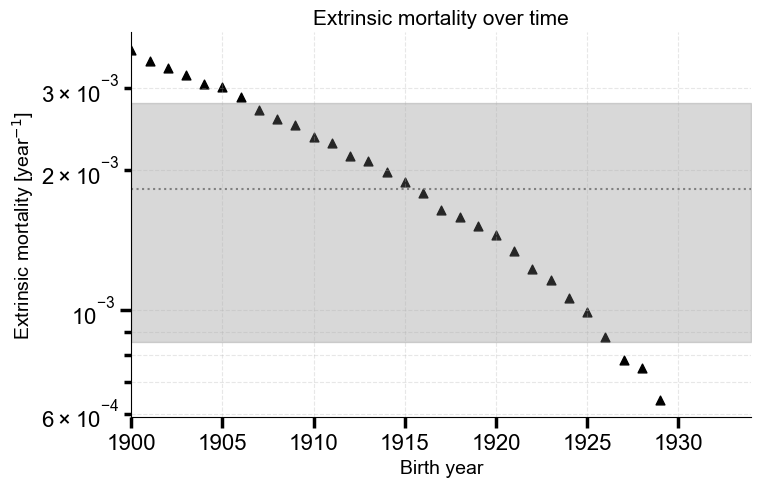

In [11]:
sweden_years = np.arange(1900, 1930, 1)
sweden_cohort_b.plot_makeham_term_trend(years = sweden_years, color = 'black')
ms = []
for year in sweden_years:
    dict = sweden_cohort_b.fit_ggm(year = year)
    ms.append(dict['m'])


# Cohort data for years 1931-35 are unavailable. Therefore, we append the last value in 5 times
if ms:
    ms.extend([ms[-1]] * 5)

sweden_years = np.arange(1900, 1935, 1)

mean_m = np.mean(ms)
std_m = np.std(ms)
plt.axhline(mean_m, color='grey', linestyle=':')
plt.fill_between([sweden_years.min(), sweden_years.max()], mean_m - std_m, mean_m + std_m, color='grey', alpha=0.3)
plt.xlim(sweden_years.min(), sweden_years.max())

print(f"Mean m: {mean_m:.5f}, Std m: {std_m:.5f}")